In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#   Importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import glob
import scipy.stats as stats

In [3]:
# Getting all flood data

path = r'./dataset_banjir/2019'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)

    li.append(df)

path = r'./dataset_banjir/2020'
all_files = glob.glob(path + "/*.csv")

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)

    li.append(df)

path = r'./dataset_banjir/2021'
all_files = glob.glob(path + "/*.csv")

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

flood_df = pd.concat(li, axis=0, ignore_index=True)

# Menghapus kolom yang tidak digunakan
flood_df.drop('waktu', inplace=True, axis=1)
flood_df.drop('longitude', inplace=True, axis=1)
flood_df.drop('latitude', inplace=True, axis=1)

In [4]:
print(flood_df.head())
print(flood_df.describe())
print(flood_df.shape)

df.head()

         nama_pintu_air    lokasi              tanggal  tinggi_air  \
0  PS. Katulampa (Hulu)  Ciliwung  2019-07-31 23:40:00         -90   
1             PS. Depok  Ciliwung  2019-07-31 23:40:00         750   
2         PA. Manggarai  Ciliwung  2019-07-31 23:01:54        5500   
3       PS. Krukut Hulu    Krukut  2019-07-31 23:40:00         100   
4          Pompa Cideng    Krukut  2019-07-31 23:40:00          60   

      status_siaga  
0  Status : Normal  
1  Status : Normal  
2  Status : Normal  
3  Status : Normal  
4  Status : Normal  
          tinggi_air
count  922715.000000
mean     1322.931111
std      1661.973720
min     -3800.000000
25%       370.000000
50%      1050.000000
75%      1860.000000
max    536650.000000
(922715, 5)


,nama_pintu_air,lokasi,latitude,longitude,tanggal,tinggi_air,status_siaga
0,Bendung. Cibalok - Gadog,Ciliwung,-6.653417,106.869551,2021-08-31 23:50:00,50,Status : Normal
1,Bendung. Katulampa (Hulu),Ciliwung,-6.633167,106.836806,2021-08-31 23:50:00,180,Status : Normal
2,PS. Depok,Ciliwung,-6.400514,106.832143,2021-08-31 23:50:00,890,Status : Normal
3,PA. Manggarai,Ciliwung,-6.207825,106.848458,2021-08-31 23:50:00,5630,Status : Normal
4,PS. Krukut Hulu,Krukut,-6.343900,106.798874,2021-08-31 23:50:00,590,Status : Normal


In [5]:
# Getting all BMKG weather data

path = r'./dataset_banjir/BMKG/2019'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)

    li.append(df)

path = r'./dataset_banjir/BMKG/2020'
all_files = glob.glob(path + "/*.csv")

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)

    li.append(df)

path = r'./dataset_banjir/BMKG/2021'
all_files = glob.glob(path + "/*.csv")

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

bmkg_df = pd.concat(li, axis=0, ignore_index=True)


In [6]:
print(bmkg_df.head())
print(bmkg_df.describe())
print(bmkg_df.shape)
bmkg_df.head()

      Tanggal    Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg  \
0  01-02-2019  25.0  31.0  27.0    83.0   8.1  3.5   3.0  260.0     1.0   
1  02-02-2019  24.0  30.8  27.9    80.0   2.2  3.2   5.0  300.0     2.0   
2  03-02-2019  25.8  31.4  28.0    83.0   0.0  4.8   4.0  280.0     1.0   
3  04-02-2019  26.6  31.6  28.5    80.0  14.0  6.5   7.0  290.0     2.0   
4  05-02-2019  25.2  31.8  28.5    80.0   0.0  2.8   5.0  300.0     1.0   

  ddd_car  
0      C   
1      C   
2      C   
3      C   
4      C   
                Tn           Tx         Tavg       RH_avg           RR  \
count  1093.000000  1115.000000  1116.000000  1116.000000   886.000000   
mean     25.805947    32.353722    28.627867    75.879032   629.873928   
std       0.927061     1.377406     0.974391     6.214165  2266.603476   
min      23.000000    27.400000    25.100000    57.000000     0.000000   
25%      25.000000    31.600000    28.000000    72.000000     0.000000   
50%      26.000000    32.500000  

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-02-2019,25.0,31.0,27.0,83.0,8.1,3.5,3.0,260.0,1.0,C
1,02-02-2019,24.0,30.8,27.9,80.0,2.2,3.2,5.0,300.0,2.0,C
2,03-02-2019,25.8,31.4,28.0,83.0,0.0,4.8,4.0,280.0,1.0,C
3,04-02-2019,26.6,31.6,28.5,80.0,14.0,6.5,7.0,290.0,2.0,C
4,05-02-2019,25.2,31.8,28.5,80.0,0.0,2.8,5.0,300.0,1.0,C


In [7]:
# Remove duplicate data from flood data
flood_df.drop_duplicates(inplace=True)
print(flood_df.shape)

(673269, 5)


In [8]:
# Convert date BMKG dataframe to datetime
print("Data type before conversion: \n")
print(bmkg_df.dtypes)

bmkg_df['Tanggal'] = bmkg_df['Tanggal'].astype(str)
bmkg_df['Tanggal'] = pd.to_datetime(bmkg_df['Tanggal'], format='%d-%m-%Y')

print("\nData type after conversion: \n")
print(bmkg_df.dtypes)

Data type before conversion: 

Tanggal     object
Tn         float64
Tx         float64
Tavg       float64
RH_avg     float64
RR         float64
ss         float64
ff_x       float64
ddd_x      float64
ff_avg     float64
ddd_car     object
dtype: object

Data type after conversion: 

Tanggal    datetime64[ns]
Tn                float64
Tx                float64
Tavg              float64
RH_avg            float64
RR                float64
ss                float64
ff_x              float64
ddd_x             float64
ff_avg            float64
ddd_car            object
dtype: object


In [9]:
# Convert date Flood dataframe to datetime
print("Data type before conversion: \n")
print(bmkg_df.dtypes)

flood_df['tanggal'] = flood_df['tanggal'].astype(str)
flood_df['tanggal'] = pd.to_datetime(flood_df['tanggal'], format='%Y-%m-%d %H:%M:%S')

print("\nData type after conversion: \n")
print(bmkg_df.dtypes)

Data type before conversion: 

Tanggal    datetime64[ns]
Tn                float64
Tx                float64
Tavg              float64
RH_avg            float64
RR                float64
ss                float64
ff_x              float64
ddd_x             float64
ff_avg            float64
ddd_car            object
dtype: object

Data type after conversion: 

Tanggal    datetime64[ns]
Tn                float64
Tx                float64
Tavg              float64
RH_avg            float64
RR                float64
ss                float64
ff_x              float64
ddd_x             float64
ff_avg            float64
ddd_car            object
dtype: object


In [10]:
# Remove all flood data with wrong year

flood_df.drop(flood_df[flood_df['tanggal'].dt.year > 2021].index, inplace=True)

In [11]:
# Crete new column with date only on flood data

flood_df['date_only'] = flood_df['tanggal'].dt.date
flood_df['date_only'] = flood_df['date_only'].astype(str)
flood_df['date_only'] = pd.to_datetime(flood_df['date_only'])
print(flood_df.head())
print(flood_df.dtypes)

         nama_pintu_air    lokasi             tanggal  tinggi_air  \
0  PS. Katulampa (Hulu)  Ciliwung 2019-07-31 23:40:00         -90   
1             PS. Depok  Ciliwung 2019-07-31 23:40:00         750   
2         PA. Manggarai  Ciliwung 2019-07-31 23:01:54        5500   
3       PS. Krukut Hulu    Krukut 2019-07-31 23:40:00         100   
4          Pompa Cideng    Krukut 2019-07-31 23:40:00          60   

      status_siaga  date_only  
0  Status : Normal 2019-07-31  
1  Status : Normal 2019-07-31  
2  Status : Normal 2019-07-31  
3  Status : Normal 2019-07-31  
4  Status : Normal 2019-07-31  
nama_pintu_air            object
lokasi                    object
tanggal           datetime64[ns]
tinggi_air                 int64
status_siaga              object
date_only         datetime64[ns]
dtype: object


In [12]:
print("flood data shape: " + str(flood_df.shape))
print()
print(flood_df.dtypes)
print()
print("BMKG data shape: " + str(bmkg_df.shape))
print()
print(bmkg_df.dtypes)

flood data shape: (673269, 6)

nama_pintu_air            object
lokasi                    object
tanggal           datetime64[ns]
tinggi_air                 int64
status_siaga              object
date_only         datetime64[ns]
dtype: object

BMKG data shape: (1132, 11)

Tanggal    datetime64[ns]
Tn                float64
Tx                float64
Tavg              float64
RH_avg            float64
RR                float64
ss                float64
ff_x              float64
ddd_x             float64
ff_avg            float64
ddd_car            object
dtype: object


In [13]:
# Combine flood data and BMKG data into one dataframe
df = pd.merge(flood_df, bmkg_df, left_on="date_only", right_on="Tanggal", how='inner')
df.head()

,nama_pintu_air,lokasi,tanggal,tinggi_air,status_siaga,date_only,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,PS. Katulampa (Hulu),Ciliwung,2019-07-31 23:40:00,-90,Status : Normal,2019-07-31,2019-07-31,25.0,34.0,28.8,65.0,0.0,5.0,5.0,270.0,1.0,C
1,PS. Depok,Ciliwung,2019-07-31 23:40:00,750,Status : Normal,2019-07-31,2019-07-31,25.0,34.0,28.8,65.0,0.0,5.0,5.0,270.0,1.0,C
2,PA. Manggarai,Ciliwung,2019-07-31 23:01:54,5500,Status : Normal,2019-07-31,2019-07-31,25.0,34.0,28.8,65.0,0.0,5.0,5.0,270.0,1.0,C
3,PS. Krukut Hulu,Krukut,2019-07-31 23:40:00,100,Status : Normal,2019-07-31,2019-07-31,25.0,34.0,28.8,65.0,0.0,5.0,5.0,270.0,1.0,C
4,Pompa Cideng,Krukut,2019-07-31 23:40:00,60,Status : Normal,2019-07-31,2019-07-31,25.0,34.0,28.8,65.0,0.0,5.0,5.0,270.0,1.0,C


In [14]:
#[df.isna().any(axis=1)].to_excel('null.xlsx')

In [15]:
print(df.head())
print(df.describe())
print(df.shape)

         nama_pintu_air    lokasi             tanggal  tinggi_air  \
0  PS. Katulampa (Hulu)  Ciliwung 2019-07-31 23:40:00         -90   
1             PS. Depok  Ciliwung 2019-07-31 23:40:00         750   
2         PA. Manggarai  Ciliwung 2019-07-31 23:01:54        5500   
3       PS. Krukut Hulu    Krukut 2019-07-31 23:40:00         100   
4          Pompa Cideng    Krukut 2019-07-31 23:40:00          60   

      status_siaga  date_only    Tanggal    Tn    Tx  Tavg  RH_avg   RR   ss  \
0  Status : Normal 2019-07-31 2019-07-31  25.0  34.0  28.8    65.0  0.0  5.0   
1  Status : Normal 2019-07-31 2019-07-31  25.0  34.0  28.8    65.0  0.0  5.0   
2  Status : Normal 2019-07-31 2019-07-31  25.0  34.0  28.8    65.0  0.0  5.0   
3  Status : Normal 2019-07-31 2019-07-31  25.0  34.0  28.8    65.0  0.0  5.0   
4  Status : Normal 2019-07-31 2019-07-31  25.0  34.0  28.8    65.0  0.0  5.0   

   ff_x  ddd_x  ff_avg ddd_car  
0   5.0  270.0     1.0      C   
1   5.0  270.0     1.0      C   
2   5

In [16]:
# Remove data with duplicate
df.drop_duplicates(inplace=True)
print(df.head())
print(df.describe())
print(df.shape)

         nama_pintu_air    lokasi             tanggal  tinggi_air  \
0  PS. Katulampa (Hulu)  Ciliwung 2019-07-31 23:40:00         -90   
1             PS. Depok  Ciliwung 2019-07-31 23:40:00         750   
2         PA. Manggarai  Ciliwung 2019-07-31 23:01:54        5500   
3       PS. Krukut Hulu    Krukut 2019-07-31 23:40:00         100   
4          Pompa Cideng    Krukut 2019-07-31 23:40:00          60   

      status_siaga  date_only    Tanggal    Tn    Tx  Tavg  RH_avg   RR   ss  \
0  Status : Normal 2019-07-31 2019-07-31  25.0  34.0  28.8    65.0  0.0  5.0   
1  Status : Normal 2019-07-31 2019-07-31  25.0  34.0  28.8    65.0  0.0  5.0   
2  Status : Normal 2019-07-31 2019-07-31  25.0  34.0  28.8    65.0  0.0  5.0   
3  Status : Normal 2019-07-31 2019-07-31  25.0  34.0  28.8    65.0  0.0  5.0   
4  Status : Normal 2019-07-31 2019-07-31  25.0  34.0  28.8    65.0  0.0  5.0   

   ff_x  ddd_x  ff_avg ddd_car  
0   5.0  270.0     1.0      C   
1   5.0  270.0     1.0      C   
2   5

Finished combining data, exploring the data

In [17]:
# Removing uneeded column including tinggi_air for research purpose
df.drop('Tanggal', inplace=True, axis=1)
df.drop('date_only', inplace=True, axis=1)
df.drop('tinggi_air', inplace=True, axis=1)
print(df.head())
print(df.describe())
print(df.shape)

         nama_pintu_air    lokasi             tanggal     status_siaga    Tn  \
0  PS. Katulampa (Hulu)  Ciliwung 2019-07-31 23:40:00  Status : Normal  25.0   
1             PS. Depok  Ciliwung 2019-07-31 23:40:00  Status : Normal  25.0   
2         PA. Manggarai  Ciliwung 2019-07-31 23:01:54  Status : Normal  25.0   
3       PS. Krukut Hulu    Krukut 2019-07-31 23:40:00  Status : Normal  25.0   
4          Pompa Cideng    Krukut 2019-07-31 23:40:00  Status : Normal  25.0   

     Tx  Tavg  RH_avg   RR   ss  ff_x  ddd_x  ff_avg ddd_car  
0  34.0  28.8    65.0  0.0  5.0   5.0  270.0     1.0      C   
1  34.0  28.8    65.0  0.0  5.0   5.0  270.0     1.0      C   
2  34.0  28.8    65.0  0.0  5.0   5.0  270.0     1.0      C   
3  34.0  28.8    65.0  0.0  5.0   5.0  270.0     1.0      C   
4  34.0  28.8    65.0  0.0  5.0   5.0  270.0     1.0      C   
                  Tn             Tx           Tavg         RH_avg  \
count  652477.000000  663150.000000  664654.000000  664654.000000   
mea

<AxesSubplot:>

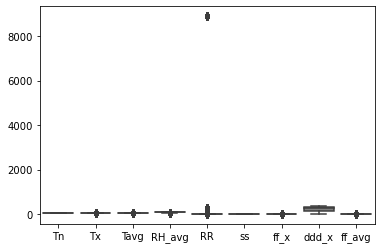

In [18]:
# Checking boxplot of data to see if there is any outliers

sns.boxplot(data=df)

In [19]:
# Correcting non inputted data

df.loc[df['RR'] == df['RR'].max()]
df['RR'].replace(8888, np.nan, inplace=True)

<AxesSubplot:>

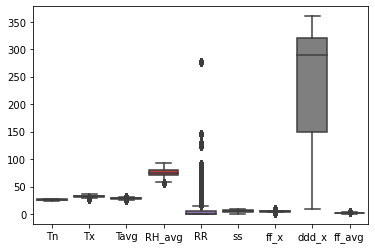

In [20]:
sns.boxplot(data=df)

In [21]:
# Checking null data
df.isna().any()

nama_pintu_air    False
lokasi            False
tanggal           False
status_siaga      False
Tn                 True
Tx                 True
Tavg               True
RH_avg             True
RR                 True
ss                 True
ff_x               True
ddd_x              True
ff_avg             True
ddd_car            True
dtype: bool

In [22]:
# Changing categorical feature to numeric
# lokasi
df['lokasi'] = df['lokasi'].astype('category')
df['lokasi'] = df['lokasi'].cat.codes

# ddd_car
df['ddd_car'] = df['ddd_car'].astype('category')
df['ddd_car'] = df['ddd_car'].cat.codes

# nama_pintu_air
df['nama_pintu_air'] = df['nama_pintu_air'].astype('category')
df['nama_pintu_air'] = df['nama_pintu_air'].cat.codes

df.dtypes

nama_pintu_air              int8
lokasi                      int8
tanggal           datetime64[ns]
status_siaga              object
Tn                       float64
Tx                       float64
Tavg                     float64
RH_avg                   float64
RR                       float64
ss                       float64
ff_x                     float64
ddd_x                    float64
ff_avg                   float64
ddd_car                     int8
dtype: object

In [23]:
# Removing all null data

# Tn
df['Tn'].fillna(int(df['Tn'].mean()), inplace=True)

# Tx
df['Tx'].fillna(int(df['Tx'].mean()), inplace=True)

# Tavg
df['Tavg'].fillna(int(df['Tavg'].mean()), inplace=True)

#RH_avg
df['RH_avg'].fillna(int(df['RH_avg'].mean()), inplace=True)

#RR
df['RR'].fillna(int(df['RR'].mean()), inplace=True)

#ss
df['ss'].fillna(int(df['ss'].mean()), inplace=True)

#ff_x
df['ff_x'].fillna(int(df['ff_x'].mean()), inplace=True)

#ddd_x
df['ddd_x'].fillna(int(df['ddd_x'].mean()), inplace=True)

#ff_avg
df['ff_avg'].fillna(int(df['ff_avg'].mean()), inplace=True)

#ddd_car
df['ddd_car'].fillna(int(df['ddd_car'].mode()), inplace=True)


df.isna().any()

nama_pintu_air    False
lokasi            False
tanggal           False
status_siaga      False
Tn                False
Tx                False
Tavg              False
RH_avg            False
RR                False
ss                False
ff_x              False
ddd_x             False
ff_avg            False
ddd_car           False
dtype: bool

In [24]:
# Checking data types before changing all categorical to int
df.dtypes

nama_pintu_air              int8
lokasi                      int8
tanggal           datetime64[ns]
status_siaga              object
Tn                       float64
Tx                       float64
Tavg                     float64
RH_avg                   float64
RR                       float64
ss                       float64
ff_x                     float64
ddd_x                    float64
ff_avg                   float64
ddd_car                     int8
dtype: object

In [25]:
#Creating new column date and month on flood data
df['month'] = df['tanggal'].dt.month
df['day'] = df['tanggal'].dt.day

df.dtypes

nama_pintu_air              int8
lokasi                      int8
tanggal           datetime64[ns]
status_siaga              object
Tn                       float64
Tx                       float64
Tavg                     float64
RH_avg                   float64
RR                       float64
ss                       float64
ff_x                     float64
ddd_x                    float64
ff_avg                   float64
ddd_car                     int8
month                      int64
day                        int64
dtype: object

In [26]:
# Randomize data and sort data
df = df.sample(frac=1).reset_index(drop=True)
df.sort_values(by='status_siaga', ascending=False, inplace=True)

In [27]:
classes = np.unique(df['status_siaga'].values)

sample_amount = int(df.loc[ df['status_siaga'] == 'Status : Normal' ].count()[0] * 2 / 3)

removed_df = df.loc[df['status_siaga'] == 'Status : Normal'].sample(sample_amount).index

df_reduced = df.drop(removed_df)

print("Before Oversampling")
print(df['status_siaga'].value_counts())

oversampler = RandomOverSampler(random_state=0)

x, y = oversampler.fit_sample(df_reduced[['lokasi', 'nama_pintu_air', 'month', 'day', 'Tn', 'Tx', 'Tavg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']], df_reduced['status_siaga'])


unmodified_df = df.copy()

df = x.join(y)

removed_df = df.loc[df['status_siaga'] == 'Status : Normal'].index

df_reduced = df.drop(removed_df)

df = pd.concat([df_reduced, unmodified_df.loc[unmodified_df['status_siaga'] == 'Status : Normal']], ignore_index=True)

print("After Oversampling")
print(df['status_siaga'].value_counts())

Before Oversampling
Status : Normal     570441
Status : Siaga 3     64508
Status : Siaga 2     36208
Status : Siaga 1      2085
Name: status_siaga, dtype: int64
After Oversampling
Status : Normal     570441
Status : Siaga 3    190147
Status : Siaga 2    190147
Status : Siaga 1    190147
Name: status_siaga, dtype: int64


In [28]:
#Feature selection with pairplotting data
#sns.pairplot(df.sample(1000), hue='status_siaga')

# Model with oversampling

In [29]:
# Modeling

# Features
features = ['lokasi', 'nama_pintu_air', 'month', 'day', 'Tn', 'Tx', 'Tavg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']
x=df[features]

# Labels
y=df['status_siaga']  

print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

# Training
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)

Status : Normal     570441
Status : Siaga 3    190147
Status : Siaga 2    190147
Status : Siaga 1    190147
Name: status_siaga, dtype: int64


In [ ]:
# Prediksi test data
y_pred = rf.predict(x_test)


print(accuracy_score(y_test, y_pred))

y_pred = dt.predict(x_test)


accuracy_score(y_test, y_pred)

0.8622122299793581


0.8622692032939341

              precision    recall  f1-score   support

      Normal       0.97      0.93      0.95    113901
     Siaga 3       0.89      0.99      0.93     38188
     Siaga 2       0.67      0.76      0.71     38168
     Siaga 1       0.72      0.64      0.68     37920

    accuracy                           0.86    228177
   macro avg       0.81      0.83      0.82    228177
weighted avg       0.87      0.86      0.86    228177



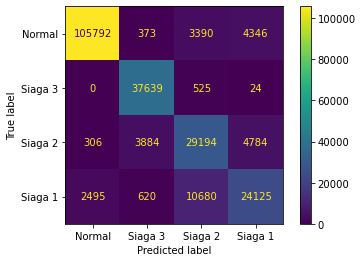

In [ ]:
labels = ['Normal', 'Siaga 3', 'Siaga 2', 'Siaga 1']

print(classification_report(y_test, y_pred, target_names=labels))

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=labels).plot()

In [ ]:
max_depth = list()
for tree in rf.estimators_:
    max_depth.append(tree.tree_.max_depth)

print("avg max depth %0.1f" % (sum(max_depth) / len(max_depth)))

avg max depth 32.1


[0.38439490905715223,
 0.2032422292179405,
 0.06385344595421479,
 0.061296190285719684,
 0.049345377546528214,
 0.04626556070452236,
 0.044573830653669655,
 0.043607326899612636,
 0.03586020289553557,
 0.032158467864175436,
 0.021279732045674953,
 0.008894822033506911,
 0.005227904841747157]

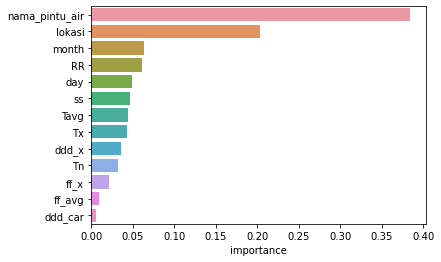

In [ ]:
feature_importancy = pd.DataFrame(rf.feature_importances_, index=features, columns=['importance'])
feature_importancy.sort_values('importance', ascending=False, inplace=True)
sns.barplot(x= feature_importancy['importance'], y=feature_importancy.index)


sorted(rf.feature_importances_, reverse=True)

## Optimized Random Forest (Same Accuracy, Less Heavier)

In [ ]:
# Modeling

# Features
features = ['lokasi', 'nama_pintu_air', 'month', 'day', 'Tn', 'Tx', 'Tavg', 'RR', 'ss', 'ddd_x']
x=df[features]

# Labels
y=df['status_siaga']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=10, max_depth=20)

# Training
rf.fit(x_train, y_train)

# Mendapatkan hasil prediksi y
y_pred = rf.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8612831266955039

              precision    recall  f1-score   support

      Normal       0.97      0.93      0.95    113901
     Siaga 3       0.89      0.99      0.93     38188
     Siaga 2       0.66      0.76      0.71     38168
     Siaga 1       0.73      0.63      0.67     37920

    accuracy                           0.86    228177
   macro avg       0.81      0.83      0.82    228177
weighted avg       0.87      0.86      0.86    228177



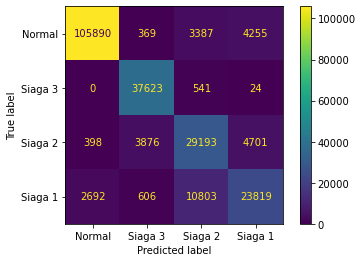

In [ ]:
labels = ['Normal', 'Siaga 3', 'Siaga 2', 'Siaga 1']

print(classification_report(y_test, y_pred, target_names=labels))

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=labels).plot()

# Model without oversampling

In [ ]:
# Modeling

# Features
features = ['lokasi', 'nama_pintu_air', 'month', 'day', 'Tn', 'Tx', 'Tavg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']
x=unmodified_df[features]

# Labels
y=unmodified_df['status_siaga']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfwo = RandomForestClassifier(n_estimators=100)

# Training
rfwo.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# predict test data
y_pred = rfwo.predict(x_test)

accuracy_score(y_test, y_pred)

0.9101292991407288

<AxesSubplot:>

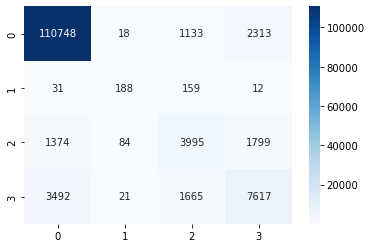

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

<AxesSubplot:>

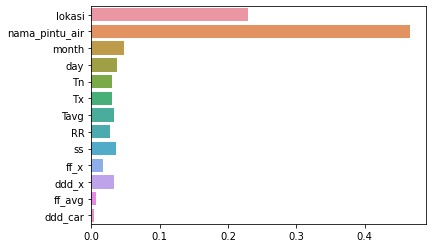

In [ ]:
sns.barplot(x=rfwo.feature_importances_, y=features, orient='h')